In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go
import plotly.colors
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [32]:
#Reading the Dataset
df = pd.read_csv("data.csv",encoding= "Latin-1")

# Data Cleaning and Preparation

# Step 1: Dataset Overview and basic Exploration

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Insights: 
1. The invoice date column is object type instead of Datetime
2. There are missing values in Description and CustomerId columns.

In [36]:
#Converted InvoiceDate column to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Step 2: Handling Missing Values

In [38]:
#Checking for missing values in the columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
#Calculating the percentage of missing values
num = round(df["CustomerID"].isnull().sum() / len(df["CustomerID"]) *100,2)
print("The percentage of missing values in the CustomerID column is:", num,'%')

The percentage of missing values in the CustomerID column is: 0.0 %


Insights: CustomerID contains a bigger chunk of missing values

In [10]:
#Dropping rows with null values
df.dropna(subset=["CustomerID"], inplace=True)

In [21]:
df.isnull().sum()

#All the missing values has been removed.

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate    4796
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

# Step 3: Handling duplicate Values

In [12]:
#Checking for duplicate values
print(df.duplicated().sum())

5225


In [13]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [14]:
#Removed  duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(401604, 8)

In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


Insights:
1. Presence of outliers is there in Quantity and UnitPrice columns.
2. The min values for Quantity is < 0, and the max values are too large.
3. Some of the values in Unit Price columns are too large.

# Step 4: Removing Cancelled Orders

In [18]:
#The invoice number with 'C' and negative quantity indicated that these were cancelled orders
cancelled_orders = df[df['Quantity']<0]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
401243,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
#Calculating the percentage of cancelled orders
round((len(df[df['Quantity']<0])/ len(df['Quantity'])*100),2)

2.21

In [20]:
#Keeping only the rows where quantity >= 0
df = df[df['Quantity']>=0]

In [21]:
df.shape

(392732, 8)

# Step 5: Exploring other columns

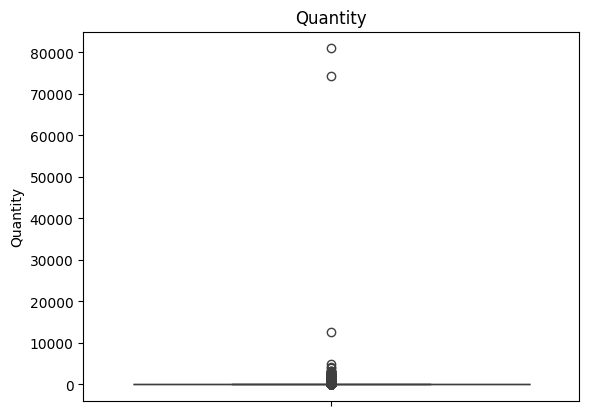

In [22]:
sns.boxplot(y=df["Quantity"])
plt.title("Quantity")
plt.ylabel("Quantity")
plt.show()

Insights:
1. Presence of Extreme outliers. The maximum value for quanitity is 80,995 which should be looked into.
2. Using the Inter-Quartile Range for the outliers removal.

In [23]:
Q1 = df["Quantity"].quantile(0.25)
Q3 = df["Quantity"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(10.0)

In [24]:
#Checking the order details with MAx quantity
df[df["Quantity"] == 80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401131,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [25]:
# Checkinf other orders made by CustomerID 16446
df[df["CustomerID"] == 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
135450,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom
135451,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom
401131,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


Findings: The customer with CustomerID 16446 had made a total of 3 orders, where two orders were with just 1 quantity each. This should be reported.

In [26]:
outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...,...
401530,581579,23581,JUMBO BAG PAISLEY PARK,40,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
401560,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
401561,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
401562,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom


In [27]:
#Removing outliers from the Quantity column
df2 = df[df["Quantity"] < 50]
df2.shape

(380234, 8)

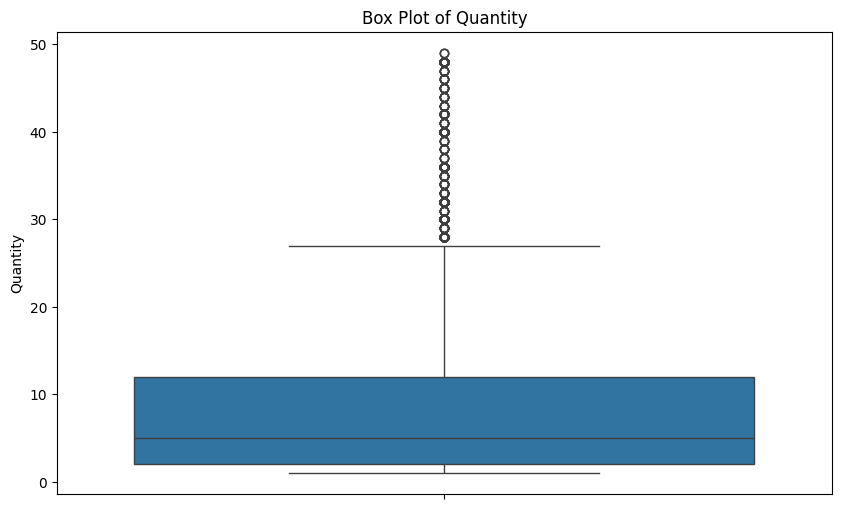

In [28]:
# Boxplot after excluding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2["Quantity"])
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.show()

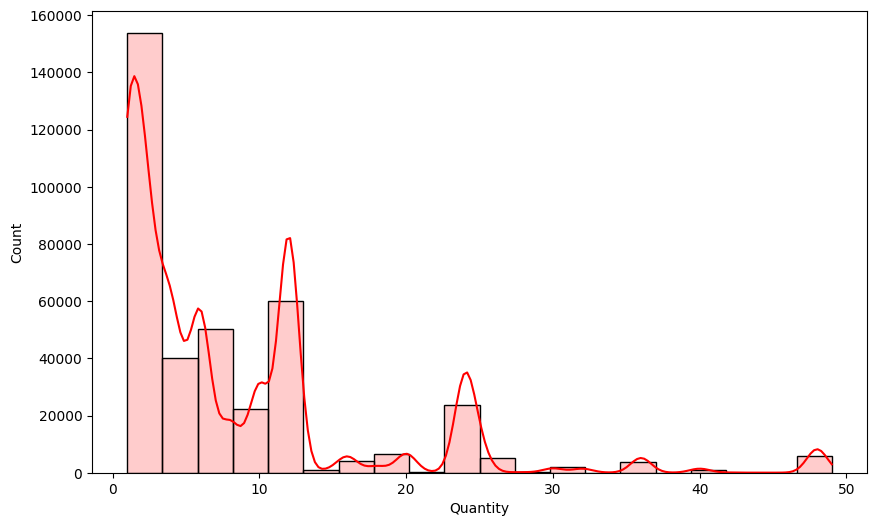

In [29]:
# Hisplot for checking the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2["Quantity"], bins=20, kde=True, color="red", alpha=0.2)
plt.show()

Insights: Most orders have low quantites. The amount of orders with large quantities are significantly low.

# Exploring Unit Price

In [30]:
df["UnitPrice"].sort_values(ascending=False)

119907    8142.75
312798    4161.06
312773    4161.06
299197    3949.32
273094    3155.95
           ...   
34903        0.00
338171       0.00
338170       0.00
199859       0.00
202393       0.00
Name: UnitPrice, Length: 392732, dtype: float64

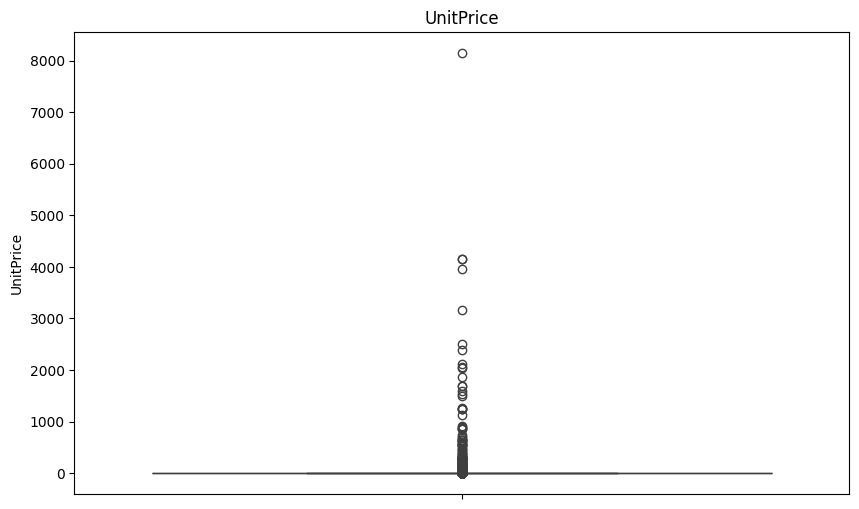

In [31]:
#Checking for outliers in Unit Price column
plt.figure(figsize=(10,6))
sns.boxplot(y=df["UnitPrice"])
plt.title("UnitPrice")
plt.ylabel("UnitPrice")
plt.show()

Insights: The unit price column contains extreme outliers. The highest price is 8142.75. which should be looked into.

In [32]:
df[df["UnitPrice"] == 8142.75]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
119907,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom


Insights: This the amount paid for postage charges. The Stockcodes that are not not products shouls be removed from the dataset.

In [33]:
df3 = df[df["UnitPrice"]<10]
df3.shape

(381920, 8)

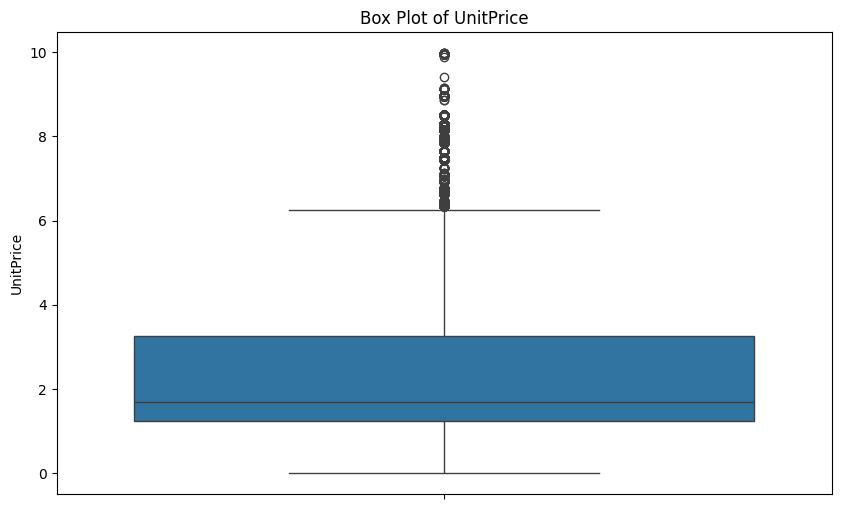

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df3["UnitPrice"])
plt.title("Box Plot of UnitPrice")
plt.ylabel("UnitPrice")
plt.show()

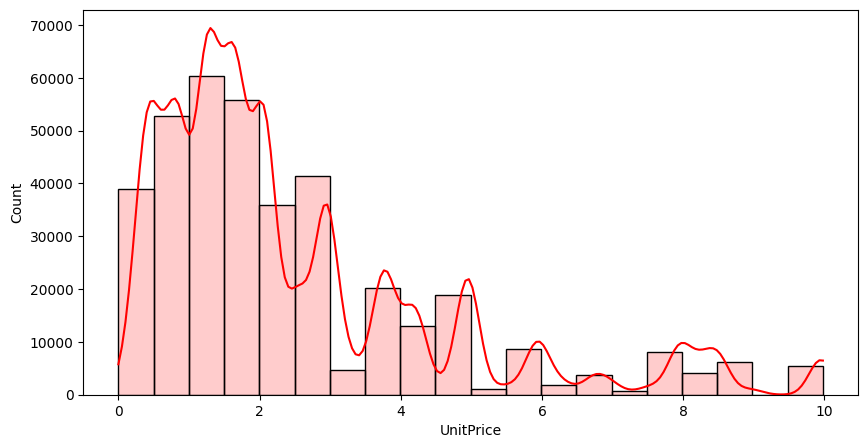

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df3["UnitPrice"], bins= 20,color= "red", kde=True, alpha= 0.2)
plt.show()

Insights: Most of the orders contain low priced products.

In [36]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Insights: 
1. Numeric Type
2. Alphanumeric Type

In [37]:
#Filtering numeric and alphanumeric Stockcodes
numeric_stockcodes = df[df["StockCode"].str.isnumeric()]

Alphanumeric_stockcodes = df[~df["StockCode"].str.isnumeric()]

print(len(numeric_stockcodes))

print(len(Alphanumeric_stockcodes))


358309
34423


Insights: Out of 367107 Stockcodes, 334992 are numeric and 32115 are not numeric. 

In [38]:
#Checking the length counts of StockCodes
df["StockCode"].str.len().value_counts()

StockCode
5     358309
6      32583
4       1103
7        291
1        285
2        133
3         16
12        12
Name: count, dtype: int64

The StockCodes are of different lenghts: 1, 2, 3, 4, 6, 7, 12

In [39]:
#Alll the StockCodes with lenght less than 5 are not products
df[df["StockCode"].str.len() < 5]["StockCode"].value_counts()

StockCode
POST    1099
M        285
C2       133
DOT       16
PADS       4
Name: count, dtype: int64

In [40]:
df[df["StockCode"] == 'PADS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
108733,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
197044,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
259711,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
260900,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


Insights: The StockCodes with length less than 5 are not valid products. Therefore, removing all the stockcodes with less than 5 length.

In [41]:
df[df["StockCode"].str.len() == 7]["Description"].value_counts()

Description
EDWARDIAN PARASOL BLACK    291
Name: count, dtype: int64

In [42]:
df[df["StockCode"].str.len() == 7].head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom


In [43]:
df[df["StockCode"] == '15056BL']["StockCode"].value_counts()

StockCode
15056BL    291
Name: count, dtype: int64

In [44]:
df[df["StockCode"].str.len() == 12]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3158,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.000,15823.0,United Kingdom
37886,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.000,15939.0,United Kingdom
104648,549717,BANK CHARGES,Bank Charges,1,2011-04-11 14:56:00,15.000,14606.0,United Kingdom
121491,551945,BANK CHARGES,Bank Charges,1,2011-05-05 11:09:00,15.000,16714.0,United Kingdom
235306,565735,BANK CHARGES,Bank Charges,1,2011-09-06 12:25:00,15.000,16904.0,United Kingdom
262731,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,15.000,13405.0,United Kingdom
262732,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom
300216,571900,BANK CHARGES,Bank Charges,1,2011-10-19 14:26:00,15.000,13263.0,United Kingdom
319837,573586,BANK CHARGES,Bank Charges,1,2011-10-31 14:48:00,15.000,14704.0,United Kingdom
327551,574546,BANK CHARGES,Bank Charges,1,2011-11-04 14:59:00,15.000,13651.0,United Kingdom


Insights: The StockCode 15056BL is a valid stockcode and stockcode having length 12 are bank charges which can be removed from the dataset.

In [45]:
# Removing all the invalid Stockcodes from the dataset and keeping only the valid ones, i.e. stockcodes of length 5, 6, 7
df = df[(df["StockCode"].str.len() >= 5) & (df["StockCode"].str.len() < 8)]

In [46]:
df["StockCode"].str.len().value_counts()

StockCode
5    358309
6     32583
7       291
Name: count, dtype: int64

In [47]:
df.shape

(391183, 8)

# Exploring Description

In [48]:
df[["StockCode", "Description"]].describe()

,StockCode,Description
count,391183,391183
unique,3659,3871
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,2023,2016


Insights: The unique count of StockCode and Description is different, that need  to be checked.

In [49]:
duplicates = df.groupby("StockCode")["Description"].nunique()
duplicates = duplicates[duplicates > 1].index

In [50]:
duplicated_rows = df[df["StockCode"].isin(duplicates)]
duplicated_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
40,536370,22900,SET 2 TEA TOWELS I LOVE LONDON,24,2010-12-01 08:45:00,2.95,12583.0,France
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401579,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15804.0,United Kingdom
401583,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom
401584,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
401598,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France


In [51]:
duplicated_rows_sorted = duplicated_rows[["StockCode", "Description"]].sort_values(by="StockCode")
duplicated_rows_sorted

,StockCode,Description
70712,16156L,"WRAP, CAROUSEL"
196026,16156L,WRAP CAROUSEL
127972,16156L,WRAP CAROUSEL
238059,16156L,WRAP CAROUSEL
134790,16156L,WRAP CAROUSEL
...,...,...
125281,90014B,GOLD M PEARL ORBIT NECKLACE
18036,90014B,GOLD M PEARL ORBIT NECKLACE
218418,90014C,SILVER/BLACK ORBIT NECKLACE
95658,90014C,SILVER/BLACK ORBIT NECKLACE


Insights: The descriptions are almost same but there are some data entry errors. In some cases, multilple descriptions of products are different because of data entry errors. We can ignore these situations as we will use StockCode for product  analysis.

# Exploring CustomerID

In [52]:
df['CustomerID'].nunique()

4335

Insight: There are 4227 unique customers as per our analysis.

In [53]:
df['CustomerID'].value_counts().head()

CustomerID
17841.0    7667
14911.0    5586
14096.0    5095
12748.0    4397
14606.0    2674
Name: count, dtype: int64

# Exploring Country

In [54]:
df["Country"].nunique()

37

In [55]:
df["Country"].value_counts().head(10)

Country
United Kingdom    348892
Germany             8644
France              8019
EIRE                7128
Spain               2418
Netherlands         2326
Belgium             1935
Switzerland         1811
Portugal            1416
Australia           1183
Name: count, dtype: int64

# Exploring InvoiceNo

In [56]:
df["InvoiceNo"].nunique()

18405

In [57]:
df["InvoiceNo"].value_counts().head(5)

InvoiceNo
576339    541
579196    532
580727    528
578270    441
573576    434
Name: count, dtype: int64

# EDA

In [58]:
df["total_sales"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [59]:
df["total_sales"].describe()

count    391183.000000
mean         22.335397
std         310.919394
min           0.000000
25%           4.950000
50%          11.900000
75%          19.800000
max      168469.600000
Name: total_sales, dtype: float64

Insights: Most of the orders have a low value of total sales.

In [60]:
#Creating a copy of DataFrame to perform further analysis
dft = df.copy()
dft.shape


(391183, 9)

In [61]:
dft["InvoiceDate"] = pd.to_datetime(dft["InvoiceDate"])

In [62]:
dft["InvoiceDate"].dt.date

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
401599    2011-12-09
401600    2011-12-09
401601    2011-12-09
401602    2011-12-09
401603    2011-12-09
Name: InvoiceDate, Length: 391183, dtype: object

In [63]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391183 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391183 non-null  object        
 1   StockCode    391183 non-null  object        
 2   Description  391183 non-null  object        
 3   Quantity     391183 non-null  int64         
 4   InvoiceDate  391183 non-null  datetime64[ns]
 5   UnitPrice    391183 non-null  float64       
 6   CustomerID   391183 non-null  float64       
 7   Country      391183 non-null  object        
 8   total_sales  391183 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.8+ MB


In [64]:
#Converting Datetime column to Date column for daily sale aanalysis
dft["InvoiceDate"] = dft["InvoiceDate"].dt.date

In [65]:
#Getting Month and day of week names
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df["Month"] = df["InvoiceDate"].dt.month_name()

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December


In [67]:
#Exporting clean data into SQL Server

from sqlalchemy import create_engine
import urllib

# Replace this with the exact name of the driver you installed
driver = "ODBC Driver 17 for SQL Server"

params = urllib.parse.quote_plus(
    f"DRIVER={{{driver}}};"
    "SERVER=Tsukuyomi\SQLEXPRESS;"  # or your server\instance
    "DATABASE=ecommerce;"
    "Trusted_Connection=yes;"
)

engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

# Example upload
df.to_sql("cleaned_transactions", con=engine, if_exists='replace', index=False)


<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\1425526525.py:11: SyntaxWarning: invalid escape sequence '\S'
  "SERVER=Tsukuyomi\SQLEXPRESS;"  # or your server\instance


163

# Sales Over time

In [68]:
daily_sales = dft.groupby("InvoiceDate")["total_sales"].sum().reset_index()
daily_sales.head()

,InvoiceDate,total_sales
0,2010-12-01,46035.29
1,2010-12-02,47164.57
2,2010-12-03,23530.93
3,2010-12-05,30905.32
4,2010-12-06,30807.90


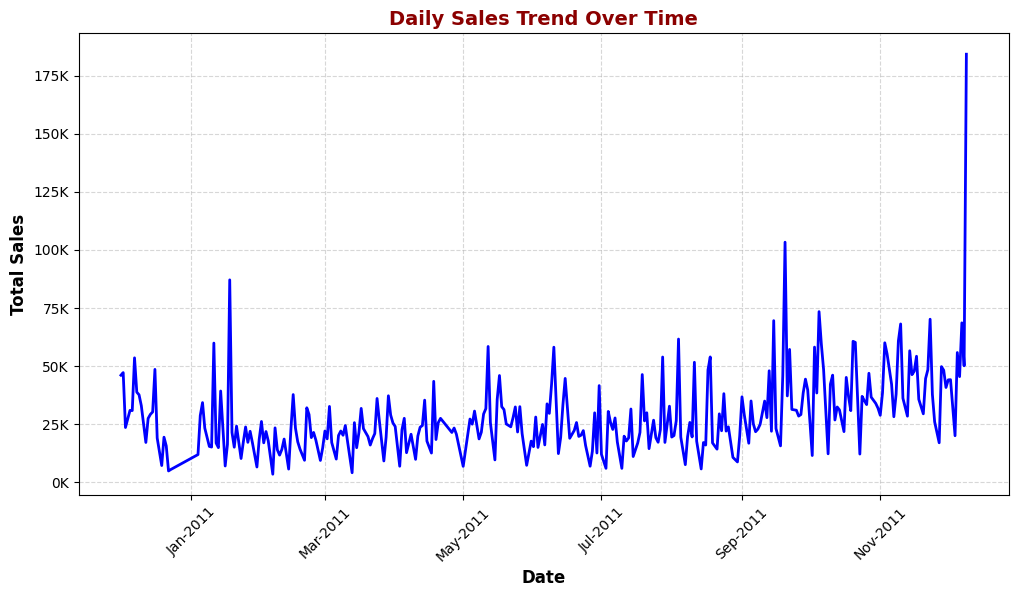

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, x="InvoiceDate", y= "total_sales", color="Blue", linewidth=2)

#Adding Lables and Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Daily Sales Trend Over Time", fontsize=14, fontweight="bold", color="darkred")

#Formatting x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=2))
plt.xticks(rotation=45)

#Formatting y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

#Creating gridlines
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [70]:
monthly_sales = df.resample('M', on="InvoiceDate")["total_sales"].sum()

#Calculating monthly sales and converting the index to month-year format
monthly_sales.index = monthly_sales.index.strftime('%b-%Y')
monthly_sales

C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\222043705.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on="InvoiceDate")["total_sales"].sum()


InvoiceDate
Dec-2010     565199.56
Jan-2011     562682.91
Feb-2011     442293.59
Mar-2011     583143.85
Apr-2011     454440.88
May-2011     659242.49
Jun-2011     653264.92
Jul-2011     591603.79
Aug-2011     635514.38
Sep-2011     938752.63
Oct-2011    1002326.56
Nov-2011    1136534.00
Dec-2011     512228.08
Name: total_sales, dtype: float64

C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\215361296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y= monthly_sales.values, palette = "deep", edgecolor="black")


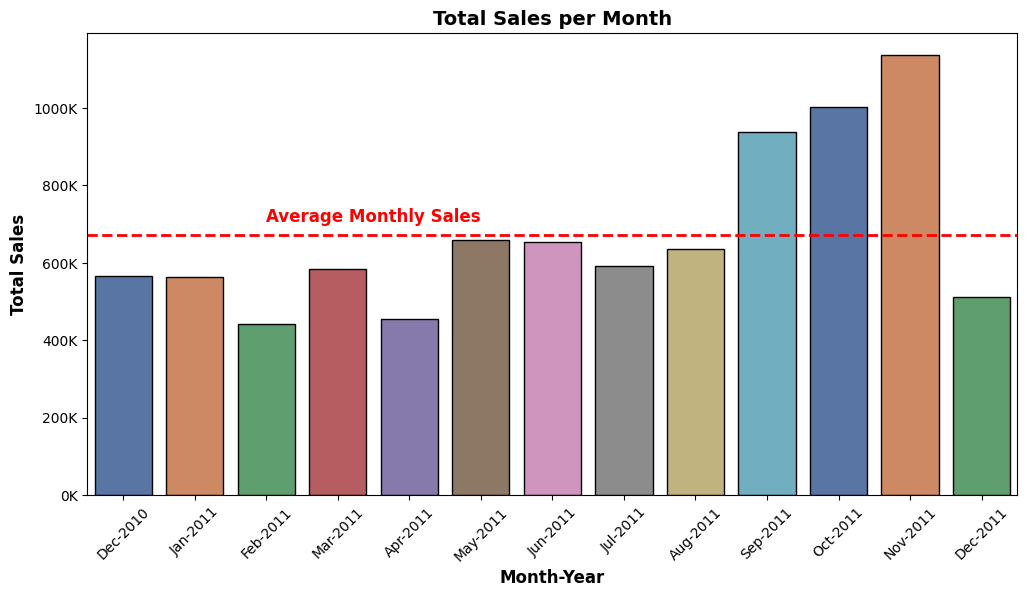

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y= monthly_sales.values, palette = "deep", edgecolor="black")

#Formatted the labels and title
plt.xlabel("Month-Year", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales",  fontsize=12, fontweight="bold")
plt.title("Total Sales per Month",  fontsize=14, fontweight="bold")

#Showing the amount in Ks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

#Calculating the average sales
average_sales = monthly_sales.values.mean()

#Creating the average sales line abouve the bars
plt.axhline(y=average_sales, color='red', linestyle='--', linewidth=2, label=f'Average Sales: ${average_sales/1000:.1f}K')

plt.text(
    x=len(monthly_sales)-11,  # X-position (0 = first month)
    y=average_sales + (average_sales * 0.05),  # Slightly above the line
    s=f'Average Monthly Sales',  # Text to display
    color='red',
    ha='left',  # Horizontal alignment
    fontsize=12,
    weight='bold'
)

#Rotatong the xlables for readability
plt.xticks(rotation=45)

plt.show()

# Sales by Day

In [72]:
df["dayofweek"] = df["InvoiceDate"].dt.day_name()

In [73]:
#Calculating sales by days and sorting the index
sales_by_day = df.groupby(df["dayofweek"])["total_sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sales_by_day

dayofweek
Monday       1326500.48
Tuesday      1672493.12
Wednesday    1559469.25
Thursday     1939228.91
Friday       1459797.08
Saturday            NaN
Sunday        779738.80
Name: total_sales, dtype: float64

C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\4142791229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette= "deep", edgecolor='black')


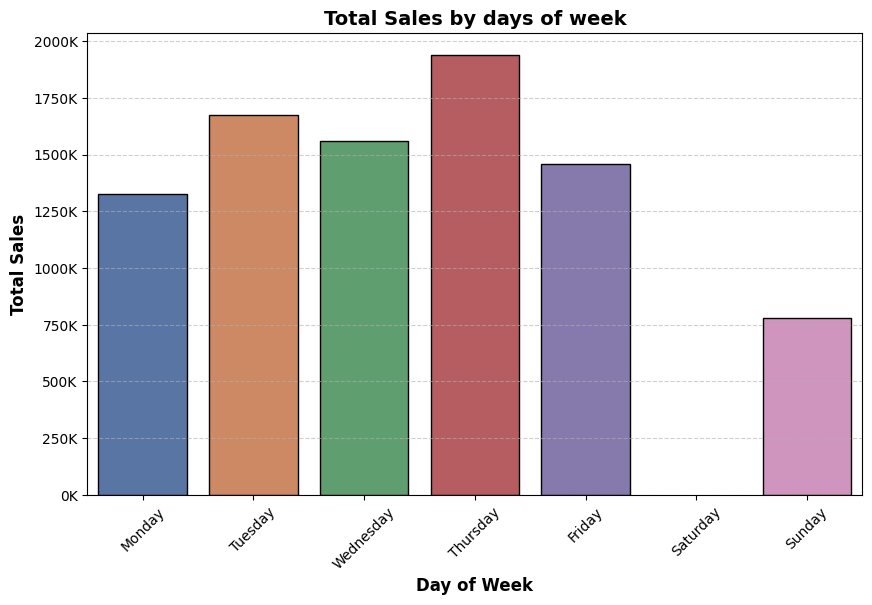

In [74]:
plt.figure(figsize=(10,6))

sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette= "deep", edgecolor='black')

#Formatting the labels and title
plt.xlabel("Day of Week", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales",  fontsize=12, fontweight="bold")
plt.title("Total Sales by days of week",  fontsize=14, fontweight="bold")

#Showing the amount in Ks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

#rotating the x-axis for readability
plt.xticks(rotation=45)

#Adding grid
plt.grid(axis="y", linestyle= "--", alpha=0.6)

plt.show()

Findings: There were no Sales on Saturdays

#  Pareto Analysis

In [75]:
df["CustomerID"].nunique()

4335

In [76]:
sales_per_customer = df.groupby("CustomerID")["total_sales"].sum().reset_index()
sales_per_customer = sales_per_customer.sort_values(by="total_sales", ascending=False).reset_index(drop=True)
sales_per_customer

,CustomerID,total_sales
0,14646.0,279138.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,136161.83
...,...,...
4330,17956.0,12.75
4331,14792.0,6.20
4332,16454.0,5.90
4333,16738.0,3.75


In [77]:
#Calculating cumulative sum percentage
sales_per_customer["CumulativePercentage"] = sales_per_customer["total_sales"].cumsum()/sales_per_customer["total_sales"].sum()*100

In [78]:
perc = round(len(sales_per_customer[sales_per_customer["CumulativePercentage"] < 80])/len(sales_per_customer)*100)

In [79]:
print(f'{perc}% of customers are making the 80% of the purchases')

26% of customers are making the 80% of the purchases


# Sales By Product

In [80]:
df["StockCode"].nunique()

3659

In [81]:
#Calculating total sales by product
sales_by_product = df.groupby("StockCode")["total_sales"].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by="total_sales", ascending=False).reset_index(drop=True)
sales_by_product

,StockCode,total_sales
0,23843,168469.60
1,22423,142264.75
2,85123A,100547.45
3,85099B,85040.54
4,23166,81416.73
...,...,...
3654,84201C,0.95
3655,90104,0.85
3656,90084,0.85
3657,21268,0.84


In [82]:
#Creating a new column cummulative sale percentage
sales_by_product["CumulativePercentage"] = sales_by_product["total_sales"].cumsum()/sales_by_product["total_sales"].sum()*100

In [83]:
sales_by_product

,StockCode,total_sales,CumulativePercentage
0,23843,168469.60,1.928181
1,22423,142264.75,3.556441
2,85123A,100547.45,4.707235
3,85099B,85040.54,5.680547
4,23166,81416.73,6.612384
...,...,...,...
3654,84201C,0.95,99.999966
3655,90104,0.85,99.999976
3656,90084,0.85,99.999986
3657,21268,0.84,99.999995


In [84]:
prod_perc = round(len(sales_by_product[sales_by_product["CumulativePercentage"]<80])/len(sales_by_product)*100)

In [85]:
print(f'{prod_perc}% of the products are driving 80% of the sales')

21% of the products are driving 80% of the sales


In [86]:
sales_vol_per_product = df.groupby("StockCode")["Quantity"].sum().reset_index()
sales_vol_per_product = sales_vol_per_product.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
sales_vol_per_product

,StockCode,Quantity
0,23843,80995
1,23166,77916
2,84077,54319
3,22197,49160
4,85099B,46078
...,...,...
3654,22323,1
3655,37461,1
3656,90025F,1
3657,90165B,1


In [87]:
sales_vol_per_product["CumulativePercentage"] = sales_vol_per_product["Quantity"].cumsum()/sales_vol_per_product["Quantity"].sum()*100
sales_vol_per_product   

,StockCode,Quantity,CumulativePercentage
0,23843,80995,1.570992
1,23166,77916,3.082262
2,84077,54319,4.135842
3,22197,49160,5.089357
4,85099B,46078,5.983093
...,...,...,...
3654,22323,1,99.999922
3655,37461,1,99.999942
3656,90025F,1,99.999961
3657,90165B,1,99.999981


In [88]:
quant_perc = round(len(sales_vol_per_product[sales_vol_per_product["CumulativePercentage"]<80])/len(sales_vol_per_product)*100)

In [89]:
print(f'{quant_perc}% of the products are contributing 80% of the sales')

23% of the products are contributing 80% of the sales


In [90]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,December,Friday
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December,Friday
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday


# RFM analysis

In [91]:
#Getting the latest date from the dataset, and adding one day to avoid 0 as the most recent day
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print(reference_date)

2011-12-10 12:50:00


In [92]:
rfm = df.groupby("CustomerID").agg({
                "InvoiceDate" : lambda x: (reference_date - x.max()).days,
                "InvoiceNo" : "nunique",
                "total_sales" : "sum"
            }).reset_index()

#Renaming the columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,310,1,294.40


In [93]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4335.000000,4335.000000,4335.000000,4335.000000
mean,15298.780392,92.684890,4.245675,2015.508106
std,1722.075082,100.172622,7.636337,8902.699230
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.500000,18.000000,1.000000,304.105000
50%,15297.000000,51.000000,2.000000,661.520000
75%,16778.500000,143.000000,5.000000,1631.475000
max,18287.000000,374.000000,206.000000,279138.020000


In [94]:
# Rank-based Frequency scoring
rfm["F_Rank"] = rfm["Frequency"].rank(method="first")

# Get bin edges for Recency, Frequency (ranked), and Monetary
_, recency_bins = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1], retbins=True)
_, frequency_bins = pd.qcut(rfm["F_Rank"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)
_, monetary_bins = pd.qcut(rfm["Monetary"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)

# Convert frequency rank bins to actual frequency values
actual_freq_bins = []
for i in range(len(frequency_bins) - 1):
    lower_rank = frequency_bins[i]
    upper_rank = frequency_bins[i + 1]
    actual_lower = rfm.loc[rfm["F_Rank"] >= lower_rank, "Frequency"].min()
    actual_upper = rfm.loc[rfm["F_Rank"] <= upper_rank, "Frequency"].max()
    actual_freq_bins.append(f"{actual_lower} - {actual_upper}")

# Create a DataFrame with readable bin ranges
rfm_bin_ranges1 = pd.DataFrame({
    "Score": [1,2,3,4,5],
    "Frequency Range (Mapped)": actual_freq_bins,
    "Monetary Range": [f"{int(monetary_bins[i])} - {int(monetary_bins[i+1])}" for i in range(len(monetary_bins)-1)]
})
rfm_bin_ranges2 = pd.DataFrame({
    "Score": [5,4,3,2,1],
    "Recency Range": [f"{int(recency_bins[i])} - {int(recency_bins[i+1])}" for i in range(len(recency_bins)-1)]
})

# Display bin ranges
print(rfm_bin_ranges1)
print(rfm_bin_ranges2)

   Score Frequency Range (Mapped) Monetary Range
0      1                    1 - 1        0 - 246
1      2                    1 - 2      246 - 482
2      3                    2 - 3      482 - 922
3      4                    3 - 5     922 - 2028
4      5                  5 - 206  2028 - 279138
   Score Recency Range
0      5        1 - 14
1      4       14 - 33
2      3       33 - 72
3      2      72 - 179
4      1     179 - 374


In [95]:
# Recency Score (lower is better, so reverse the labels)
rfm["R_Score"] = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1])

# Frequency Score (higher is better)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

# Monetary Score (higher is better)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

rfm.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score
0,12346.0,326,1,77183.60,1.0,1,1,5
1,12347.0,2,7,4310.00,3644.0,5,5,5
2,12348.0,75,4,1437.24,2840.0,2,4,4
3,12349.0,19,1,1457.55,2.0,4,1,4
4,12350.0,310,1,294.40,3.0,1,1,2


In [96]:
#The datatype for scores is category
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4335 non-null   float64 
 1   Recency     4335 non-null   int64   
 2   Frequency   4335 non-null   int64   
 3   Monetary    4335 non-null   float64 
 4   F_Rank      4335 non-null   float64 
 5   R_Score     4335 non-null   category
 6   F_Score     4335 non-null   category
 7   M_Score     4335 non-null   category
dtypes: category(3), float64(3), int64(2)
memory usage: 182.8 KB


In [97]:
#Changing the datatype from category to int
rfm["R_Score"] = rfm["R_Score"].astype(int)
rfm["F_Score"] = rfm["F_Score"].astype(int)
rfm["M_Score"] = rfm["M_Score"].astype(int)

In [98]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4335 non-null   float64
 1   Recency     4335 non-null   int64  
 2   Frequency   4335 non-null   int64  
 3   Monetary    4335 non-null   float64
 4   F_Rank      4335 non-null   float64
 5   R_Score     4335 non-null   int64  
 6   F_Score     4335 non-null   int64  
 7   M_Score     4335 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 271.1 KB


In [99]:
def customer_segment(x):
    if x["R_Score"] == 5 and x["F_Score"] ==5:
        return "High Value"
    elif x["R_Score"] >=4 and x["F_Score"] >=4:
        return "Loyal"
    elif x["R_Score"] >=2 or x["F_Score"] >=2:
        return "At risk"
    else:
        return "Dormant"

In [100]:
rfm["Segment"] = rfm.apply(customer_segment, axis=1)

In [101]:
rfm["Segment"].value_counts()

Segment
At risk       2837
Loyal          693
High Value     443
Dormant        362
Name: count, dtype: int64

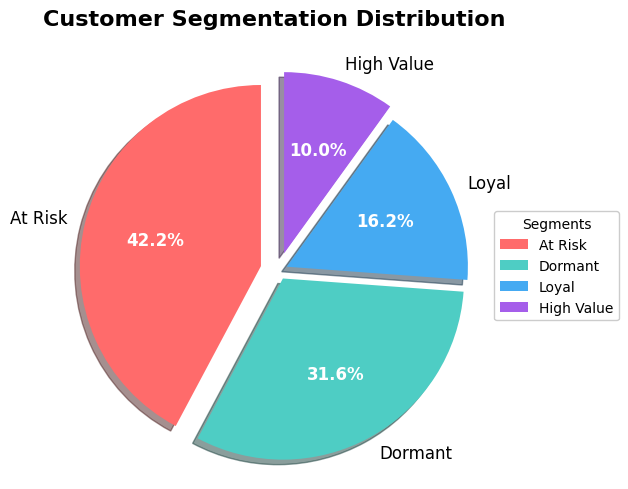

In [102]:
segments = ['At Risk', 'Dormant', 'Loyal', 'High Value']
counts = [1784, 1337, 685, 421]
colors = ['#ff6b6b', '#4ecdc4', '#45aaf2', '#a55eea']  # Solid vibrant colors
explode = (0.1, 0.05, 0.05, 0.1)  # All segments slightly exploded

# Create pie chart
plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(counts, 
                                  labels=segments, 
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=explode,
                                  shadow=True,
                                  textprops={'fontsize': 12})

# Make labels bold and white inside the wedges
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Customer Segmentation Distribution', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')

# Add legend with white background
plt.legend(wedges, segments,
           title="Segments",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           frameon=True,
           framealpha=1)

plt.tight_layout()
plt.show()

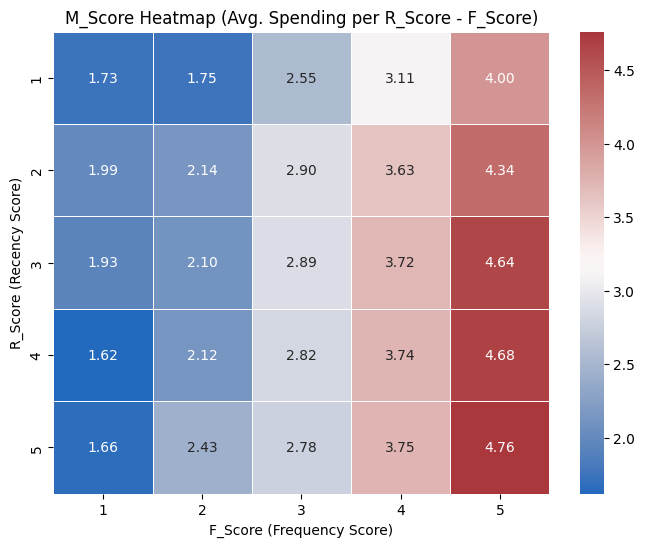

In [103]:
#Creating a pivot table
rfm_pivot = rfm.pivot_table(index="R_Score", columns= "F_Score", values= "M_Score", aggfunc= "mean", fill_value=0)

#Creating a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap= "vlag", annot=True, fmt=".2f", linewidths=0.5)

#Formatting the title and labels
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)")
plt.xlabel("F_Score (Frequency Score)")
plt.ylabel("R_Score (Recency Score)")

plt.show()

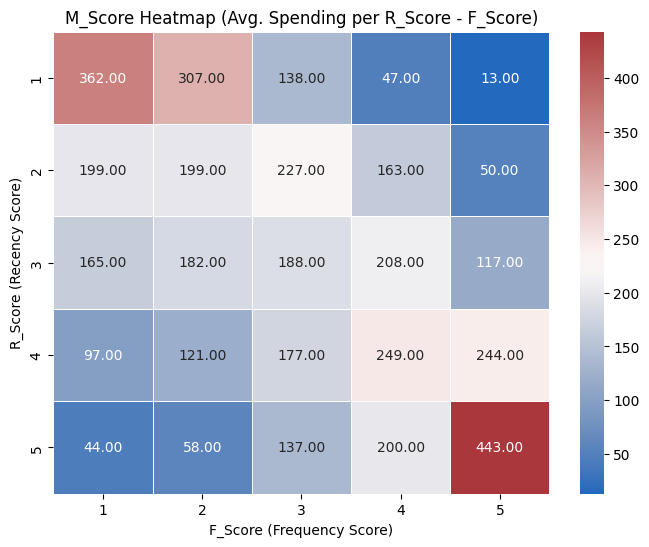

In [104]:
#Creating a pivot table
rfm_pivot2 = rfm.pivot_table(index="R_Score", columns= "F_Score", values= "M_Score", aggfunc= "count", fill_value=0)

#Creating a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot2, cmap= "vlag", annot=True, fmt=".2f", linewidths=0.5)

#Formatting the title and labels
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)")
plt.xlabel("F_Score (Frequency Score)")
plt.ylabel("R_Score (Recency Score)")

plt.show()

In [105]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value
2,12348.0,75,4,1437.24,2840.0,2,4,4,At risk
3,12349.0,19,1,1457.55,2.0,4,1,4,At risk
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant


In [106]:
# Calculating first purchase date for the customers
first_purchase_dates = df.groupby("CustomerID")["InvoiceDate"].min().reset_index()
first_purchase_dates.columns = ['CustomerID', 'FirstPurchaseDate']
first_purchase_dates

,CustomerID,FirstPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4330,18280.0,2011-03-07 09:52:00
4331,18281.0,2011-06-12 10:53:00
4332,18282.0,2011-08-05 13:35:00
4333,18283.0,2011-01-06 14:14:00


In [107]:
# Left merge to add FirstPurchaseDate to rfm
rfm = rfm.merge(first_purchase_dates, on='CustomerID', how='left')
rfm.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment,FirstPurchaseDate
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant,2011-01-18 10:01:00
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value,2010-12-07 14:57:00
2,12348.0,75,4,1437.24,2840.0,2,4,4,At risk,2010-12-16 19:09:00
3,12349.0,19,1,1457.55,2.0,4,1,4,At risk,2011-11-21 09:51:00
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant,2011-02-02 16:01:00


In [108]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment,FirstPurchaseDate
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant,2011-01-18 10:01:00
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value,2010-12-07 14:57:00
2,12348.0,75,4,1437.24,2840.0,2,4,4,At risk,2010-12-16 19:09:00
3,12349.0,19,1,1457.55,2.0,4,1,4,At risk,2011-11-21 09:51:00
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant,2011-02-02 16:01:00


In [109]:
import urllib.parse
from sqlalchemy import create_engine, VARCHAR, INTEGER, FLOAT

# Connection setup
driver = "ODBC Driver 17 for SQL Server"
params = urllib.parse.quote_plus(
    f"DRIVER={{{driver}}};"
    "SERVER=Tsukuyomi\SQLEXPRESS;"  # Escape backslash or use raw string (r"...")
    "DATABASE=ecommerce;"
    "Trusted_Connection=yes;"
)
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

# Define data types (optional but recommended)
dtype = {
    "customer_id": VARCHAR(50),
    "Recency": INTEGER(),
    "Frequency": INTEGER(),
    "Monetary": FLOAT(),  # Or DECIMAL(18,2) if precision critical
    "Segment": VARCHAR(50)
}

# Upload with error handling
try:
    rfm.to_sql(
        "customer_rfm_segments", 
        con=engine, 
        if_exists='replace', 
        index=False,
        dtype=dtype
    )
    print("RFM table exported successfully!")
except Exception as e:
    print(f"Error exporting to SQL: {e}")
finally:
    engine.dispose()  # Close connection

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\1729913621.py:8: SyntaxWarning: invalid escape sequence '\S'
  "SERVER=Tsukuyomi\SQLEXPRESS;"  # Escape backslash or use raw string (r"...")


RFM table exported successfully!


# Decile Analysis

In [110]:
# Calculate deciles (1=Top 10%, 10=Bottom 10%)
rfm['decile'] = pd.qcut(rfm['Monetary'], q=10, labels=range(10, 0, -1))

# Group by decile and aggregate
decile_stats = rfm.groupby('decile').agg(
    customer_count=('CustomerID', 'count'),  # Unique customers per decile
    transaction_count=('Frequency', 'sum'),   # Total transactions per decile
    total_revenue=('Monetary', 'sum'),        # Revenue per decile
    avg_revenue=('Monetary', 'mean')         # Avg spend per customer
).sort_index(ascending=False).reset_index()

#Round the values in avg column
decile_stats['avg_revenue'] = decile_stats['avg_revenue'].round(2)

print(decile_stats)

  decile  customer_count  transaction_count  total_revenue  avg_revenue
0      1             433               7133     5362453.87     12384.42
1      2             434               2978     1155925.11      2663.42
2      3             434               2078      715103.28      1647.70
3      4             433               1586      480754.65      1110.29
4      5             433               1251      337816.89       780.18
5      6             434                969      248477.88       572.53
6      7             433                739      175775.62       405.95
7      8             434                632      130113.82       299.80
8      9             433                553       85377.87       197.18
9     10             434                486       45428.65       104.67


C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\3025098114.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_stats = rfm.groupby('decile').agg(


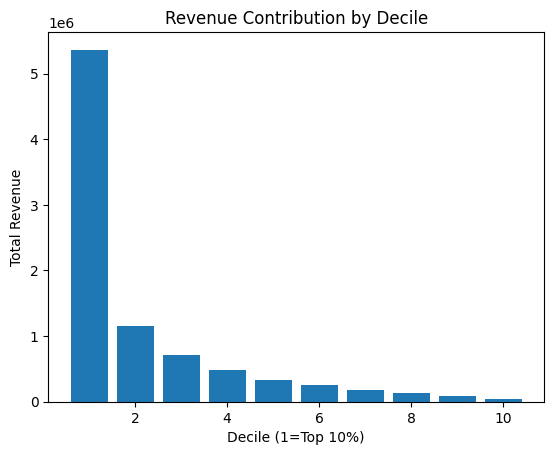

In [111]:
# Pareto Chart (Revenue by Decile)
plt.bar(decile_stats['decile'], decile_stats['total_revenue'])
plt.title("Revenue Contribution by Decile")
plt.xlabel("Decile (1=Top 10%)")
plt.ylabel("Total Revenue")
plt.show()

In [112]:
from sqlalchemy import create_engine, Integer, Float
import urllib.parse

driver = "ODBC Driver 17 for SQL Server"
server = "Tsukuyomi\\SQLEXPRESS"  # Escape backslash or use raw string
database = "ecommerce"
params = urllib.parse.quote_plus(
    f"DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# Export to SQL (replace existing table)
decile_stats.to_sql(
    name="customer_decile_stats",  # New table name
    con=engine,
    if_exists="replace",  # Use 'replace' for new table, 'append' to add to existing
    index=False,
    dtype={
        "decile": Integer(),
        "customer_count": Integer(),
        "transaction_count": Integer(),
        "total_revenue": Float(),
        "avg_revenue": Float()
    }
)
print("Exported to SQL successfully!")

Exported to SQL successfully!


# Customer Churn Analysis

In [113]:
cust_churn = df.copy()
cust_churn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,December,Friday
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December,Friday
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday


In [114]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391183 entries, 0 to 401603
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391183 non-null  object        
 1   StockCode    391183 non-null  object        
 2   Description  391183 non-null  object        
 3   Quantity     391183 non-null  int64         
 4   InvoiceDate  391183 non-null  datetime64[ns]
 5   UnitPrice    391183 non-null  float64       
 6   CustomerID   391183 non-null  float64       
 7   Country      391183 non-null  object        
 8   total_sales  391183 non-null  float64       
 9   DayOfWeek    391183 non-null  object        
 10  Month        391183 non-null  object        
 11  dayofweek    391183 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 38.8+ MB


In [115]:
cust_churn["InvoiceDate"] = pd.to_datetime(cust_churn["InvoiceDate"], errors='coerce')

In [116]:
#Extracting Year-Month from the invoice date column
cust_churn["Purchase_month"] = cust_churn["InvoiceDate"].dt.to_period("M")

In [117]:
#Calculating the first mnoth of purchase for each customer
first_purchase = cust_churn.groupby("CustomerID")["Purchase_month"].min().reset_index()
first_purchase.rename(columns={"Purchase_month": "First_purchase_month"}, inplace=True)
first_purchase

,CustomerID,First_purchase_month
0,12346.0,2011-01
1,12347.0,2010-12
2,12348.0,2010-12
3,12349.0,2011-11
4,12350.0,2011-02
...,...,...
4330,18280.0,2011-03
4331,18281.0,2011-06
4332,18282.0,2011-08
4333,18283.0,2011-01


In [118]:
#Merging the dataframes
cust_churn = cust_churn.merge(first_purchase,on= "CustomerID", how="left")

In [119]:
cust_churn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month,dayofweek,Purchase_month,First_purchase_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,Wednesday,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,Wednesday,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12


In [120]:
#Defining churn threshold
churn_threshold = 90

In [121]:
def customer_type(row):
    if row["Purchase_month"] == row["First_purchase_month"]:
        return "New Customer"
    elif (cust_churn["InvoiceDate"].max() - row["InvoiceDate"]).days > churn_threshold:
        return "Churned customer"
    else:
        return "Returning customer"
        

In [122]:
cust_churn["Customer_type"] = cust_churn.apply(customer_type, axis=1)

In [123]:
cust_churn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month,dayofweek,Purchase_month,First_purchase_month,Customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391178,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,December,Friday,2011-12,2011-08,Returning customer
391179,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December,Friday,2011-12,2011-08,Returning customer
391180,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday,2011-12,2011-08,Returning customer
391181,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,Friday,2011-12,2011-08,Returning customer


In [124]:
Customer_trends = cust_churn.groupby(["Purchase_month", "Customer_type"])["CustomerID"].nunique().reset_index()
Customer_trends.rename(columns={"CustomerID": "Customer_count"}, inplace=True)

#Converting datatype to String
Customer_trends["Purchase_month"] = Customer_trends["Purchase_month"].astype(str)

Customer_trends

,Purchase_month,Customer_type,Customer_count
0,2010-12,New Customer,884
1,2011-01,Churned customer,323
2,2011-01,New Customer,416
3,2011-02,Churned customer,377
4,2011-02,New Customer,380
5,2011-03,Churned customer,521
6,2011-03,New Customer,452
7,2011-04,Churned customer,553
8,2011-04,New Customer,300
9,2011-05,Churned customer,770


In [125]:
cust_churn.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,DayOfWeek,Month,dayofweek,Purchase_month,First_purchase_month,Customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,Wednesday,2010-12,2010-12,New Customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,Wednesday,2010-12,2010-12,New Customer


   CustomerID    LastPurchaseDate  DaysSinceLastPurchase  Churned
0     12346.0 2011-01-18 10:01:00                    325     True
1     12347.0 2011-12-07 15:52:00                      1    False
2     12348.0 2011-09-25 13:13:00                     74    False
3     12349.0 2011-11-21 09:51:00                     18    False
4     12350.0 2011-02-02 16:01:00                    309     True
   LastPurchaseMonth  Churned  ActiveCustomers  ChurnRate
8            2011-08      215              933  23.043944
9            2011-09       78             1259   6.195393
10           2011-10        0             1361   0.000000
11           2011-11        0             1661   0.000000
12           2011-12        0              614   0.000000


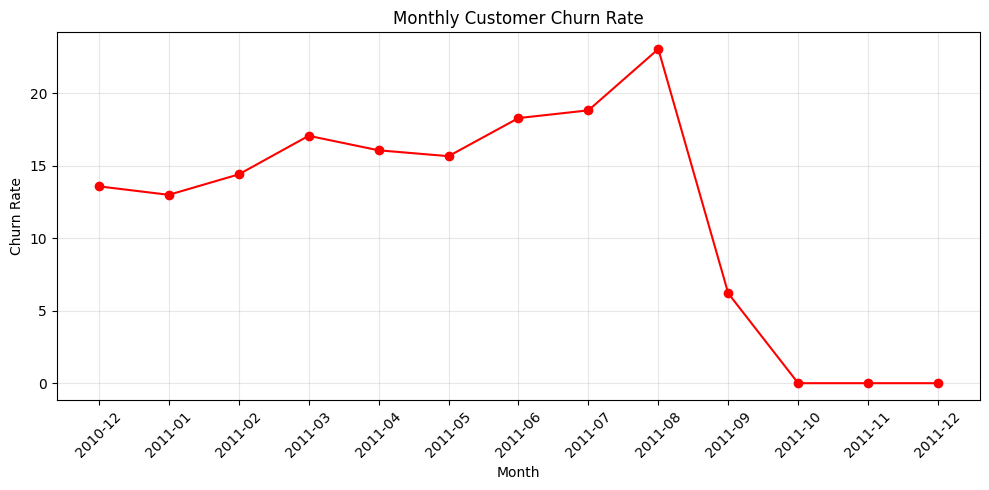

Improved churn analysis complete. Table and chart above show monthly churn rates.


In [126]:
# Improved churn analysis: aggregate at customer level and calculate churn rate per month

# 1. Prepare the data: ensure InvoiceDate is datetime
cust_churn = df.copy()
cust_churn['InvoiceDate'] = pd.to_datetime(cust_churn['InvoiceDate'], errors='coerce')

# 2. For each customer, get their last purchase date
df_last_purchase = cust_churn.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_last_purchase.rename(columns={'InvoiceDate': 'LastPurchaseDate'}, inplace=True)

# 3. Set churn threshold (e.g., 90 days)
churn_threshold = 90
analysis_date = cust_churn['InvoiceDate'].max()
df_last_purchase['DaysSinceLastPurchase'] = (analysis_date - df_last_purchase['LastPurchaseDate']).dt.days

# 4. Label churned customers (last purchase > threshold days ago)
df_last_purchase['Churned'] = df_last_purchase['DaysSinceLastPurchase'] > churn_threshold

# 5. Show summary table
print(df_last_purchase.head())

# 6. Calculate churn rate by month
# For each month, count customers whose last purchase was in that month and who have not purchased since
cust_churn['PurchaseMonth'] = cust_churn['InvoiceDate'].dt.to_period('M')
last_purchase_month = cust_churn.groupby('CustomerID')['InvoiceDate'].max().dt.to_period('M')
last_purchase_month = last_purchase_month.reset_index().rename(columns={'InvoiceDate': 'LastPurchaseMonth'})

# Merge last purchase month into main df
cust_churn = cust_churn.merge(last_purchase_month, on='CustomerID', how='left')

# For each month, count number of customers whose last purchase was in that month and who are now churned
monthly_churn = df_last_purchase.merge(last_purchase_month, on='CustomerID')
monthly_churn = monthly_churn.groupby('LastPurchaseMonth')['Churned'].sum().reset_index()
monthly_churn['LastPurchaseMonth'] = monthly_churn['LastPurchaseMonth'].astype(str)

# For denominator, count number of active customers at start of each month
active_customers = cust_churn.groupby('PurchaseMonth')['CustomerID'].nunique().reset_index()
active_customers.rename(columns={'CustomerID': 'ActiveCustomers', 'PurchaseMonth': 'Month'}, inplace=True)
active_customers['Month'] = active_customers['Month'].astype(str)

# Merge churn and active customers
df_churn_rate = pd.merge(monthly_churn, active_customers, left_on='LastPurchaseMonth', right_on='Month', how='left')
df_churn_rate['ChurnRate'] = df_churn_rate['Churned'] / df_churn_rate['ActiveCustomers'] * 100

# Show churn rate table
print(df_churn_rate[['LastPurchaseMonth', 'Churned', 'ActiveCustomers', 'ChurnRate']].tail())

# 7. Plot churn rate over time
plt.figure(figsize=(10,5))
plt.plot(df_churn_rate['LastPurchaseMonth'], df_churn_rate['ChurnRate'], marker='o', color='red')
plt.title('Monthly Customer Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('Improved churn analysis complete. Table and chart above show monthly churn rates.')

In [127]:
df_churn_rate

,LastPurchaseMonth,Churned,Month,ActiveCustomers,ChurnRate
0,2010-12,120,2010-12,884,13.574661
1,2011-01,96,2011-01,739,12.990528
2,2011-02,109,2011-02,757,14.398943
3,2011-03,166,2011-03,973,17.060637
4,2011-04,137,2011-04,853,16.060961
5,2011-05,165,2011-05,1054,15.654649
6,2011-06,181,2011-06,990,18.282828
7,2011-07,178,2011-07,946,18.816068
8,2011-08,215,2011-08,933,23.043944
9,2011-09,78,2011-09,1259,6.195393


In [128]:
Customer_trends.head(1)

,Purchase_month,Customer_type,Customer_count
0,2010-12,New Customer,884


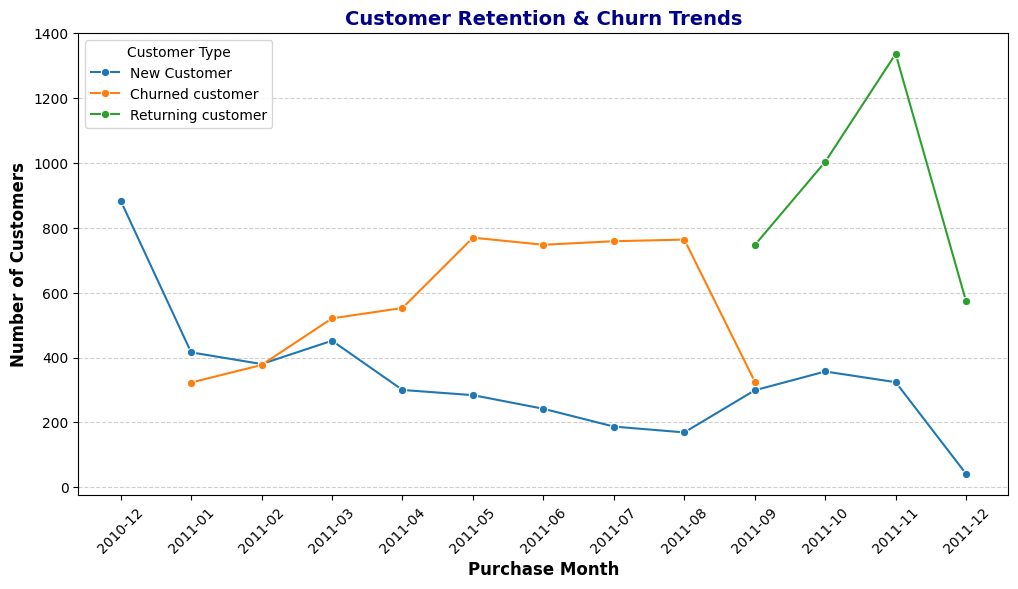

In [129]:
plt.figure(figsize=(12, 6))

# Line plot of customer trends over time
sns.lineplot(data=Customer_trends, x='Purchase_month', y='Customer_count', hue='Customer_type', marker='o')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Purchase Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Retention & Churn Trends', fontsize=14, fontweight='bold', color='darkblue')
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

C:\Users\tabis\AppData\Local\Temp\ipykernel_8292\478943024.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


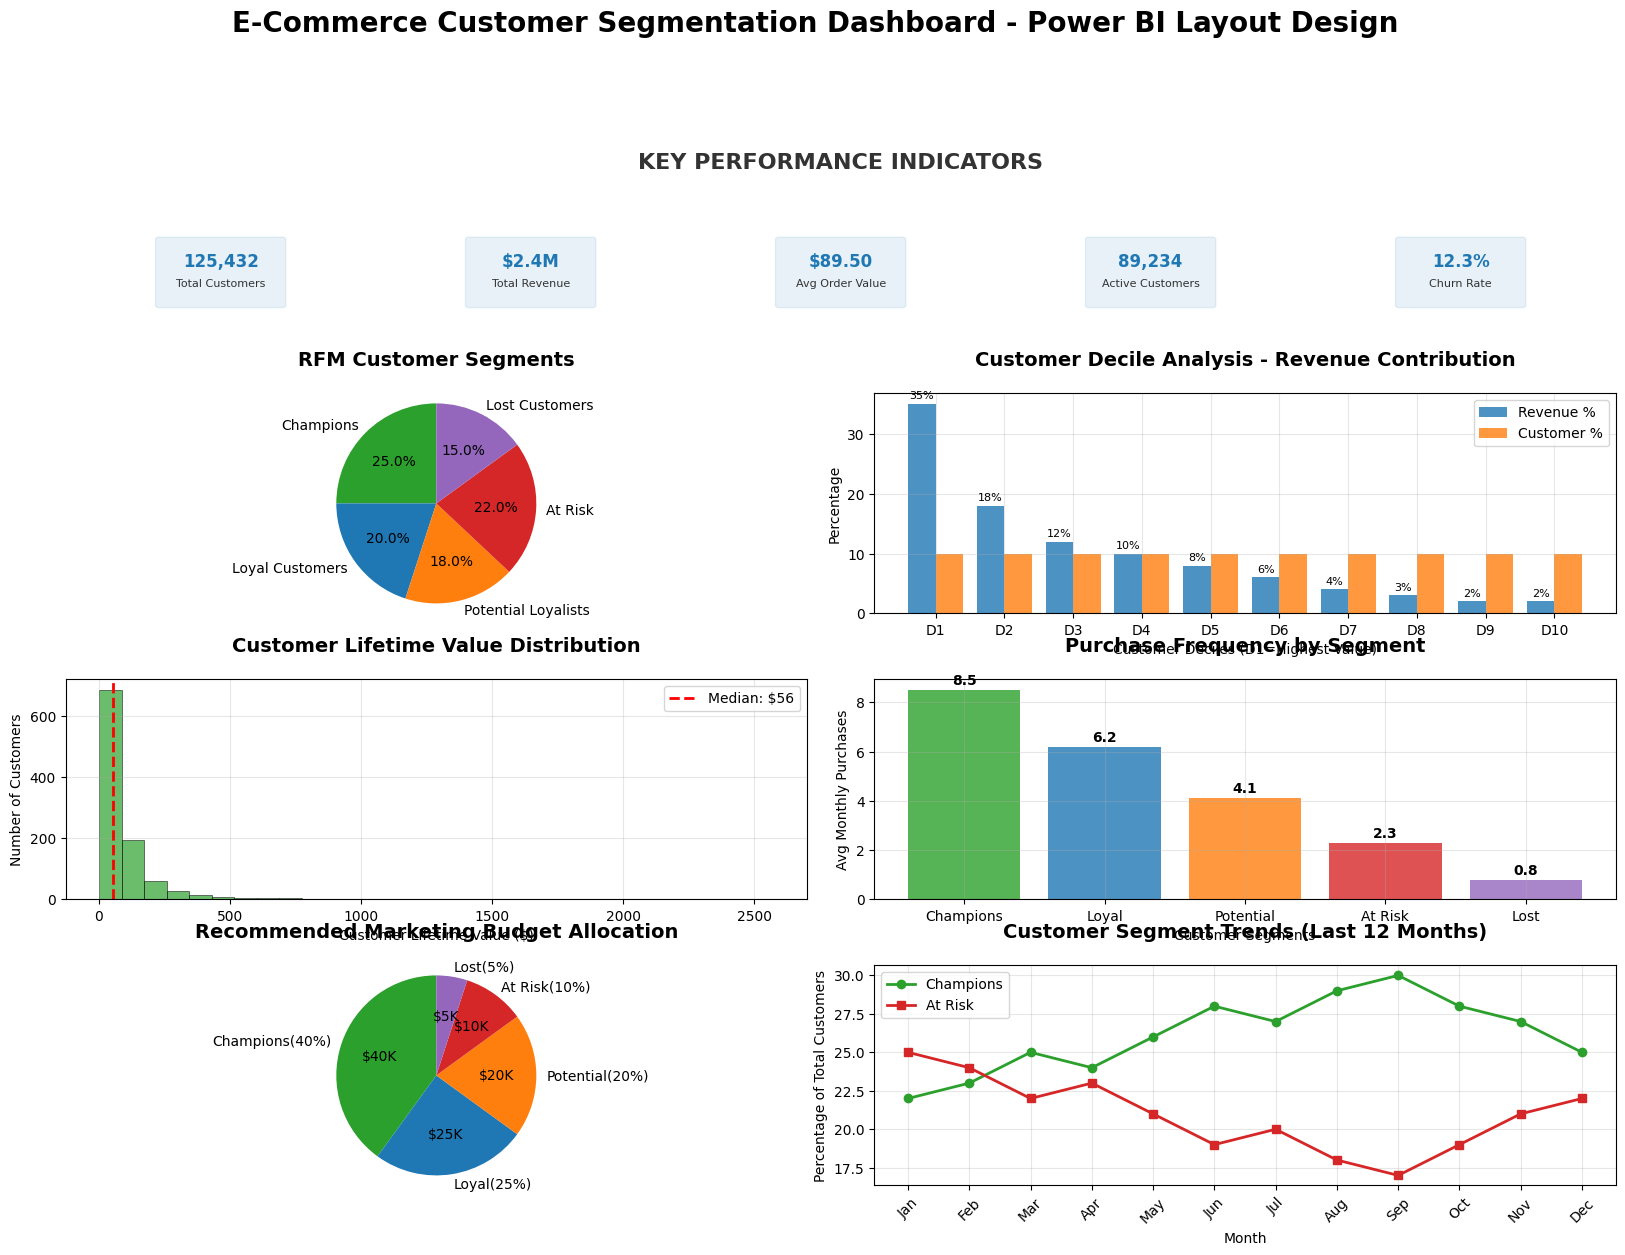

Dashboard Layout Created Successfully!
Key Dashboard Components:
1. Header KPIs - Total Customers, Revenue, AOV, Active Customers, Churn Rate
2. RFM Segmentation Pie Chart - Visual breakdown of customer segments
3. Decile Analysis Bar Chart - Revenue contribution by customer deciles
4. CLV Distribution Histogram - Customer lifetime value spread
5. Purchase Frequency by Segment - Behavioral insights
6. Marketing Budget Allocation - Strategic resource planning
7. Trend Analysis - Time-series view of segment evolution


In [130]:
# Create a comprehensive Power BI dashboard mockup for customer segmentation project
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, FancyBboxPatch
import numpy as np

# Create figure with multiple subplots to represent dashboard layout
fig = plt.figure(figsize=(20, 14))
fig.suptitle('E-Commerce Customer Segmentation Dashboard - Power BI Layout Design', 
             fontsize=20, fontweight='bold', y=0.95)

# Define colors
primary_color = '#1f77b4'
secondary_color = '#ff7f0e'
accent_color = '#2ca02c'
background_color = '#f8f9fa'
text_color = '#333333'

# Create main layout grid
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.2)

# 1. Header KPIs (Top Row)
ax1 = fig.add_subplot(gs[0, :])
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 2)
ax1.axis('off')
ax1.text(5, 1.5, 'KEY PERFORMANCE INDICATORS', ha='center', va='center', 
         fontsize=16, fontweight='bold', color=text_color)

# KPI Cards
kpi_positions = [(1, 0.5), (3, 0.5), (5, 0.5), (7, 0.5), (9, 0.5)]
kpi_labels = ['Total Customers', 'Total Revenue', 'Avg Order Value', 'Active Customers', 'Churn Rate']
kpi_values = ['125,432', '$2.4M', '$89.50', '89,234', '12.3%']

for i, ((x, y), label, value) in enumerate(zip(kpi_positions, kpi_labels, kpi_values)):
    # KPI card background
    rect = FancyBboxPatch((x-0.4, y-0.3), 0.8, 0.6, boxstyle="round,pad=0.02", 
                         facecolor=primary_color, alpha=0.1, edgecolor=primary_color)
    ax1.add_patch(rect)
    ax1.text(x, y+0.1, value, ha='center', va='center', fontsize=12, fontweight='bold', color=primary_color)
    ax1.text(x, y-0.1, label, ha='center', va='center', fontsize=8, color=text_color)

# 2. RFM Segmentation Matrix (Top Left)
ax2 = fig.add_subplot(gs[1, :2])
ax2.set_title('RFM Customer Segments', fontsize=14, fontweight='bold', pad=20)

# Create RFM matrix visualization
rfm_data = np.random.rand(5, 5)
segments = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost Customers']
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

# Create pie chart for segments
sizes = [25, 20, 18, 22, 15]
ax2.pie(sizes, labels=segments, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

# 3. Decile Analysis (Top Right)
ax3 = fig.add_subplot(gs[1, 2:])
ax3.set_title('Customer Decile Analysis - Revenue Contribution', fontsize=14, fontweight='bold', pad=20)

deciles = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
revenue_contribution = [35, 18, 12, 10, 8, 6, 4, 3, 2, 2]
customer_count = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

x_pos = np.arange(len(deciles))
bars1 = ax3.bar(x_pos - 0.2, revenue_contribution, 0.4, label='Revenue %', color=primary_color, alpha=0.8)
bars2 = ax3.bar(x_pos + 0.2, customer_count, 0.4, label='Customer %', color=secondary_color, alpha=0.8)

ax3.set_xlabel('Customer Deciles (D1=Highest Value)')
ax3.set_ylabel('Percentage')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(deciles)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height}%',
             ha='center', va='bottom', fontsize=8)

# 4. Customer Lifetime Value Distribution (Middle Left)
ax4 = fig.add_subplot(gs[2, :2])
ax4.set_title('Customer Lifetime Value Distribution', fontsize=14, fontweight='bold', pad=20)

# Generate sample CLV data
np.random.seed(42)
clv_data = np.random.lognormal(4, 1, 1000)
ax4.hist(clv_data, bins=30, color=accent_color, alpha=0.7, edgecolor='black', linewidth=0.5)
ax4.set_xlabel('Customer Lifetime Value ($)')
ax4.set_ylabel('Number of Customers')
ax4.grid(True, alpha=0.3)

# Add median line
median_clv = np.median(clv_data)
ax4.axvline(median_clv, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_clv:.0f}')
ax4.legend()

# 5. Purchase Frequency Analysis (Middle Right)
ax5 = fig.add_subplot(gs[2, 2:])
ax5.set_title('Purchase Frequency by Segment', fontsize=14, fontweight='bold', pad=20)

segments_freq = ['Champions', 'Loyal', 'Potential', 'At Risk', 'Lost']
frequency = [8.5, 6.2, 4.1, 2.3, 0.8]
colors_freq = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

bars = ax5.bar(segments_freq, frequency, color=colors_freq, alpha=0.8)
ax5.set_ylabel('Avg Monthly Purchases')
ax5.set_xlabel('Customer Segments')
ax5.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{height}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 6. Marketing Budget Allocation (Bottom Left)
ax6 = fig.add_subplot(gs[3, :2])
ax6.set_title('Recommended Marketing Budget Allocation', fontsize=14, fontweight='bold', pad=20)

budget_segments = ['Champions\
(40%)', 'Loyal\
(25%)', 'Potential\
(20%)', 'At Risk\
(10%)', 'Lost\
(5%)']
budget_allocation = [40, 25, 20, 10, 5]
colors_budget = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

wedges, texts, autotexts = ax6.pie(budget_allocation, labels=budget_segments, colors=colors_budget, 
                                  autopct='$%1.0fK', startangle=90)
ax6.axis('equal')

# 7. Trend Analysis (Bottom Right)
ax7 = fig.add_subplot(gs[3, 2:])
ax7.set_title('Customer Segment Trends (Last 12 Months)', fontsize=14, fontweight='bold', pad=20)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
champions_trend = [22, 23, 25, 24, 26, 28, 27, 29, 30, 28, 27, 25]
at_risk_trend = [25, 24, 22, 23, 21, 19, 20, 18, 17, 19, 21, 22]

ax7.plot(months, champions_trend, marker='o', linewidth=2, label='Champions', color='#2ca02c')
ax7.plot(months, at_risk_trend, marker='s', linewidth=2, label='At Risk', color='#d62728')
ax7.set_ylabel('Percentage of Total Customers')
ax7.set_xlabel('Month')
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Dashboard Layout Created Successfully!")
print("\
Key Dashboard Components:")
print("1. Header KPIs - Total Customers, Revenue, AOV, Active Customers, Churn Rate")
print("2. RFM Segmentation Pie Chart - Visual breakdown of customer segments")
print("3. Decile Analysis Bar Chart - Revenue contribution by customer deciles")
print("4. CLV Distribution Histogram - Customer lifetime value spread")
print("5. Purchase Frequency by Segment - Behavioral insights")
print("6. Marketing Budget Allocation - Strategic resource planning")
print("7. Trend Analysis - Time-series view of segment evolution")